# Linear Regression from Scratch

This notebook implements Linear Regression from scratch using:
- NumPy
- Pandas
- Matplotlib

 No ML libraries are used.

Dataset: Medical Price Dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("Medical Price Dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


 Data Preprocessing

Steps:
1. Check missing values
2. Encode categorical columns
3. Feature scaling

In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
df=pd.get_dummies(df,drop_first=True)
X=df.drop("charges",axis=1).values.astype(float)
y=df["charges"].values.astype(float)

Feature Normalization

In [ ]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    std[std==0]=1
    return (X - mean) / std

X = normalize(X)

In [10]:
split=int(0.8*len(X))
X_train=X[:split]
X_test=X[split:]

y_train=y[:split]
y_test=y[split:]

## Linear Regression From Scratch (Gradient Descent)


In [ ]:
def linear_regression_train(X,y,lr=0.01,epochs=1000):
    m,n=X.shape
    X=np.c_[np.ones(m),X]
    weights=np.zeros(n+1)

    losses=[]
    for _ in range(epochs):
        y_pred=X.dot(weights)
        error=y_pred - y
        loss=(1/(2*m)*np.sum(error**2))
        losses.append(loss)
        
        gradients=(1/m)*X.T.dot(error)
        weights -= lr*gradients
    return weights,losses

def linear_regression_predict(X, weights):
    m = X.shape[0]
    X = np.c_[np.ones(m), X]
    return X.dot(weights)

In [14]:
weights,losses=linear_regression_train(X_train,y_train)
y_pred=linear_regression_predict(X_test,weights)

Model Evaluation

In [15]:
def r2_score(y_true,y_pred):
    ss_res=np.sum((y_true-y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

R2 Score: 0.7585604010433599


Training Loss Curve

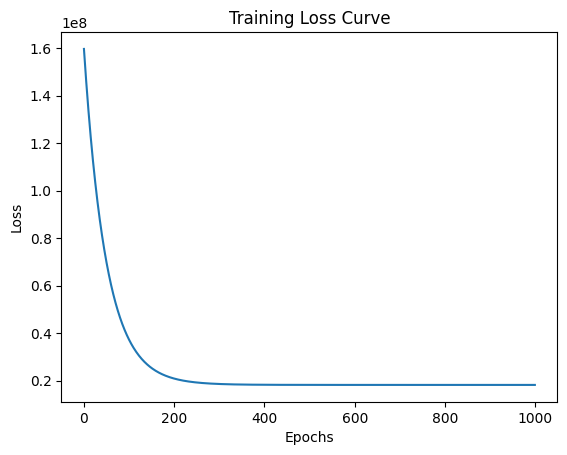

In [16]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()